In [1]:
import pandas as pd

data = pd.read_csv("creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
unlabeled_data = data.drop(columns=["Class"], axis=1)
classes = data["Class"]

In [3]:
unlabeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
unlabeled_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [5]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

As shown above, the data set is highly unbalanced. There are 492 records are of class 1 showing anomaly, whereas there are 284315 records for class 0. So, let's try in 2 ways, the first ww let the dataset as it is, and the second is to balance the dataset and check the effect of imbalance of a dataset on evaluation.

In [6]:
data_class_1 = data[data["Class"] == 1]
data_class_0 = data[data["Class"] == 0]

data_class_0 = data_class_0[:492]
balanced_data = pd.concat([data_class_1, data_class_0], axis=0)

balanced_classes = balanced_data["Class"]
balanced_data.drop(columns=["Class"], axis=1, inplace=True)

In [7]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 541 to 491
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V22  

In [8]:
balanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


Let's check now the distribution of the Amount and Time features. 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

C:\Users\Dear\AppData\Local\Temp\ipykernel_10748\3708457058.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unlabeled_data["Amount"])
C:\Users\Dear\AppData\Local\Temp\ipykernel_10748\3708457058.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unlabeled_data["Time"])


Text(0.5, 1.0, 'Distribution of Time')

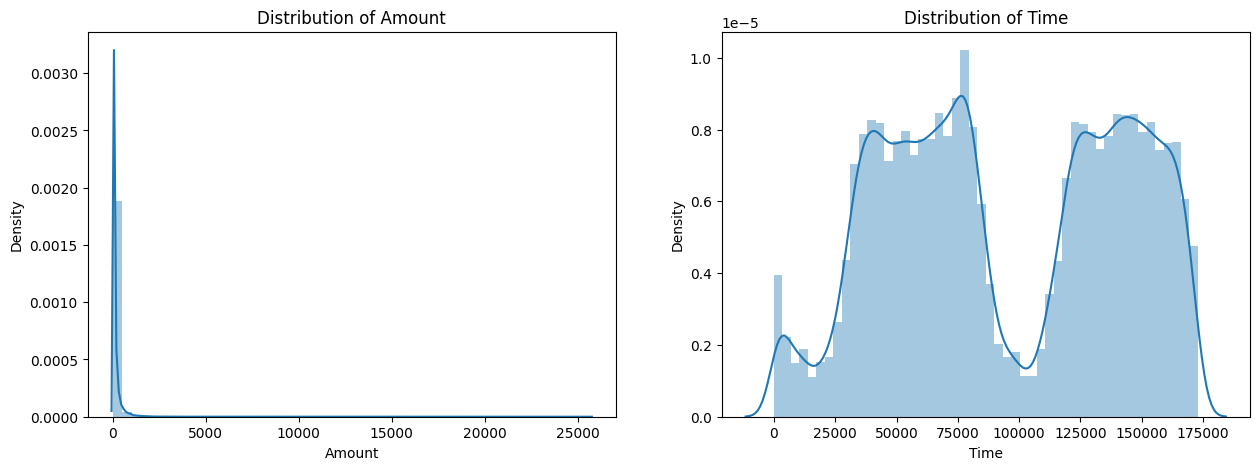

In [10]:
features = ["Amount", "Time"]
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1, 2, 1)
sns.distplot(unlabeled_data["Amount"])
plt.title("Distribution of Amount")

plt.subplot(1, 2, 2)
sns.distplot(unlabeled_data["Time"])
plt.title("Distribution of Time")


As shown above, ther is no specific pattern for the distribution of Time, whereas Amount is extremely skewed to the left.

C:\Users\Dear\AppData\Local\Temp\ipykernel_10748\1822512838.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data["Amount"])
C:\Users\Dear\AppData\Local\Temp\ipykernel_10748\1822512838.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data["Time"])


Text(0.5, 1.0, 'Distribution of Time')

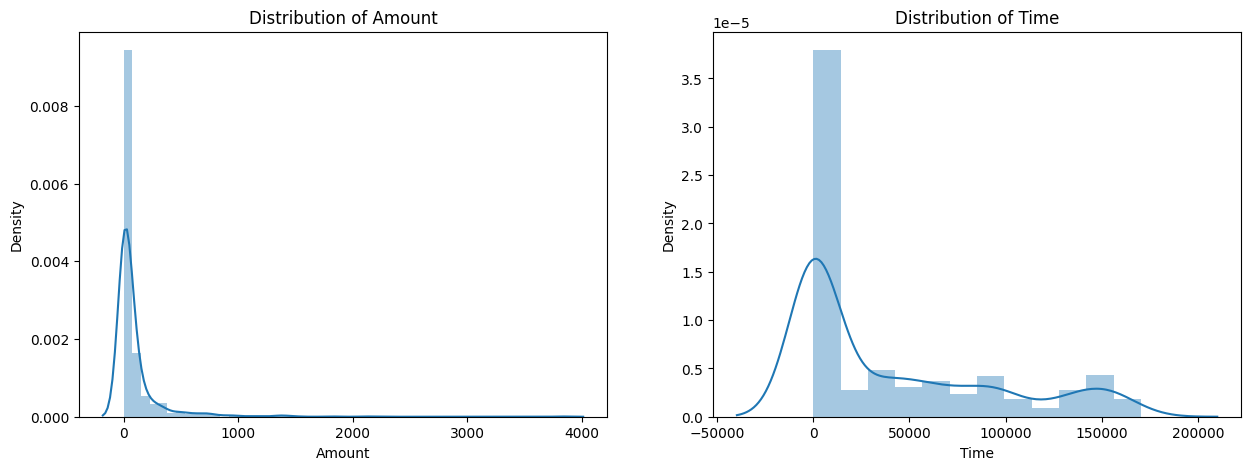

In [11]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1, 2, 1)
sns.distplot(balanced_data["Amount"])
plt.title("Distribution of Amount")

plt.subplot(1, 2, 2)
sns.distplot(balanced_data["Time"])
plt.title("Distribution of Time")

We have the same results for the balanced data

In [12]:
unlabeled_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [13]:
balanced_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,40460.391260,-2.467403,1.905304,-3.083884,2.456780,-1.561726,-0.572584,-2.730903,0.261082,-1.301145,...,0.211179,0.354898,-0.044481,-0.036529,-0.047380,0.087571,0.026120,0.096182,0.027865,96.224593
std,52607.976219,5.407122,3.596109,6.435905,3.042722,4.202692,1.803657,5.863242,4.850081,2.266780,...,1.061353,2.787267,1.145080,1.148960,0.586683,0.640419,0.468299,1.003732,0.442955,240.142397
min,0.000000,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,0.000000
25%,167.000000,-2.788129,0.085200,-5.084967,0.345951,-1.692661,-1.442584,-3.060742,-0.170996,-2.222204,...,-0.166192,-0.173785,-0.533915,-0.226458,-0.415078,-0.216776,-0.296613,-0.039310,-0.049952,1.790000
50%,383.000000,-0.781327,0.954502,-0.309446,1.383210,-0.390293,-0.510317,-0.433163,0.153493,-0.584912,...,0.052782,0.093024,-0.028825,-0.050720,0.027849,0.127459,-0.015632,0.065185,0.037457,15.910000
75%,75562.250000,0.870308,2.726800,0.934280,4.175332,0.427009,0.233236,0.304743,0.808184,0.114193,...,0.414730,0.713646,0.440345,0.142884,0.393393,0.456121,0.308815,0.455031,0.217936,93.237500
max,170348.000000,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,...,11.059004,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,3828.040000


Now, we will do feature scaling due to the diversity in the range of features so the model won't be dominated by the features with larger ranges

In [14]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

num_features = list(unlabeled_data.columns)
for feature in num_features:
    unlabeled_data[feature] = mms.fit_transform(unlabeled_data[[feature]])#first normalize
    unlabeled_data[feature] = ss.fit_transform(unlabeled_data[[feature]])#then standardize

In [15]:
unlabeled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [16]:
#do the same work on the balanced dataset
for feature in num_features:
    balanced_data[feature] = mms.fit_transform(balanced_data[[feature]])#first normalize
    balanced_data[feature] = ss.fit_transform(balanced_data[[feature]])#then standardize

In [17]:
balanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-0.761762,0.028713,0.012990,0.229149,0.506753,0.247476,-0.473702,0.033022,0.233223,-0.648361,...,-0.079438,0.058271,0.008241,-0.373294,0.626855,-0.067258,0.324144,0.164433,-0.386559,-0.400902
623,-0.760507,-0.106606,-1.408518,0.648622,-0.055287,0.695511,-0.273050,0.521560,-0.067843,0.454705,...,1.782745,0.110127,0.419362,1.229993,-0.420240,0.300311,-0.366367,-0.347834,0.017841,1.803078
4920,-0.684624,0.030356,-0.040636,0.423487,-0.041608,0.176190,0.275578,0.561958,-0.136197,0.469138,...,-0.604443,-0.232986,-0.775807,0.182218,-0.068128,-0.380702,-1.215116,-0.056434,-0.408588,0.598722
6108,-0.636622,-0.357224,-0.152169,0.076336,0.073329,0.103223,-0.629016,-0.130590,-0.105177,0.464938,...,-0.360843,0.078495,0.193490,-0.348037,-0.010439,0.257517,-1.460511,-0.920352,1.856005,-0.155089
6329,-0.626486,0.684934,0.310058,-0.189769,0.748400,1.234581,-0.435538,0.758387,-0.156250,0.008071,...,-0.190532,-0.263462,-0.576410,-0.540133,-2.703466,2.189259,1.155142,-0.105857,0.268623,-0.396736


In [18]:
#Get the model ready
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=100,      
    max_samples='auto',    
    contamination=0.1,     
    random_state=42        
)


In [19]:
from sklearn.model_selection import train_test_split

X_unbalanced_train, X_unbalanced_test, y_unbalanced_train, y_unbalanced_test = train_test_split(unlabeled_data, classes,
                                                                                                test_size=0.2,       
                                                                                                random_state=42)

X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(balanced_data, balanced_classes,
                                                                                        test_size=0.2,       
                                                                                        random_state=42)

In [20]:
iso_forest.fit(X_unbalanced_train, y_unbalanced_train)
iso_forest.fit(X_balanced_train, y_balanced_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.1
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [21]:
pred_balanced = iso_forest.predict(X_balanced_test)
pred_unbalanced = iso_forest.predict(X_unbalanced_test)

This model predict 1 as normal and -1 as anomaly, and our dataset has 0 for normal and 1 for anomaly, so we fix these values to get valid results

In [22]:
# Convert to 0 (normal), 1 (fraud/anomaly)
pred_balanced = [1 if p == -1 else 0 for p in pred_balanced]
pred_unbalanced = [1 if p == -1 else 0 for p in pred_unbalanced]

Now we evaluate the results

[Text(0.5, 1.0, 'Accuracy for Balanced and Unbalanced Data')]

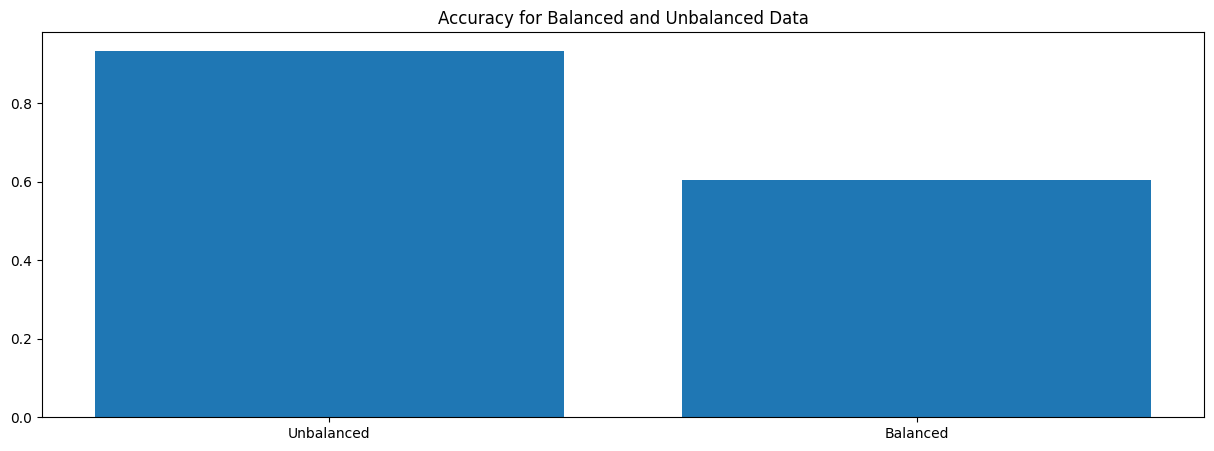

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy = {"Unbalanced":accuracy_score(y_unbalanced_test, pred_unbalanced),
                        "Balanced":accuracy_score(y_balanced_test, pred_balanced)}

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(accuracy.keys(), accuracy.values())
ax.set(title="Accuracy for Balanced and Unbalanced Data")

[Text(0.5, 1.0, 'Recall for Balanced and Unbalanced Data')]

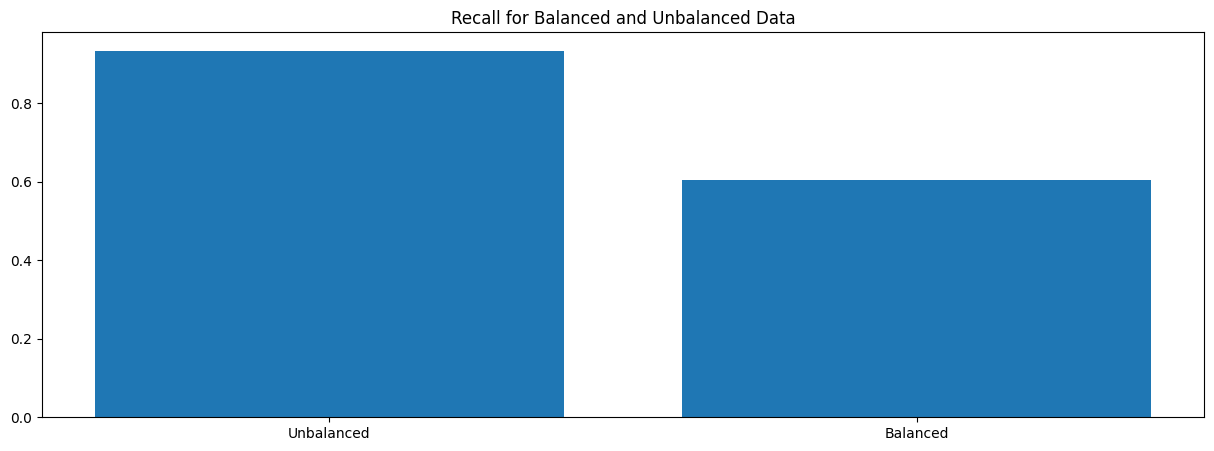

In [24]:
recall = {"Unbalanced":recall_score(y_unbalanced_test, pred_unbalanced, average='micro'),
                        "Balanced":recall_score(y_balanced_test, pred_balanced, average='micro')}


fig, ax = plt.subplots(figsize=(15,5))

ax.bar(recall.keys(), recall.values())
ax.set(title="Recall for Balanced and Unbalanced Data")

[Text(0.5, 1.0, 'precision for Balanced and Unbalanced Data')]

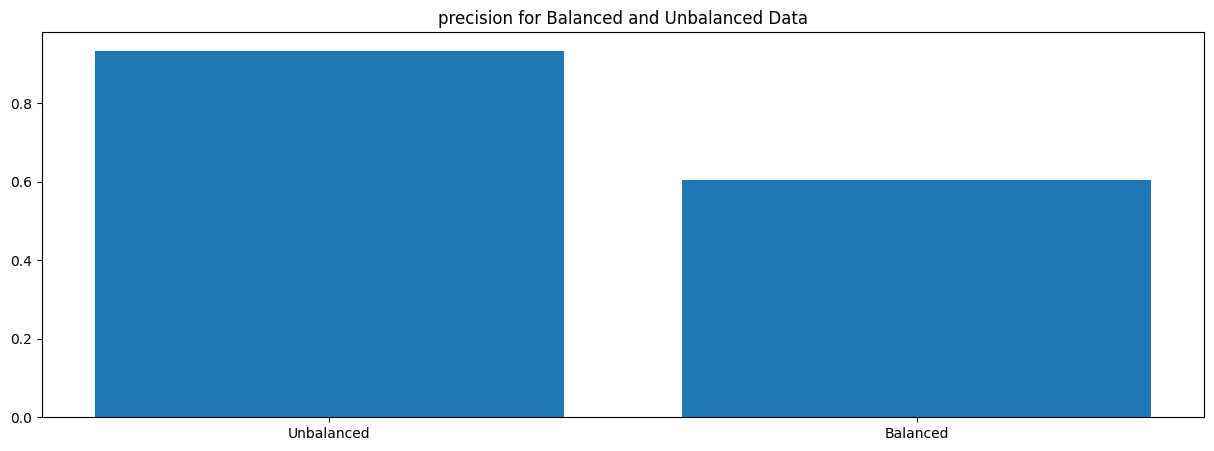

In [25]:
precision = {"Unbalanced":precision_score(y_unbalanced_test, pred_unbalanced, average='micro'),
                        "Balanced":precision_score(y_balanced_test, pred_balanced, average='micro')}

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(precision.keys(), precision.values())
ax.set(title="precision for Balanced and Unbalanced Data")

[Text(0.5, 1.0, 'f1 for Balanced and Unbalanced Data')]

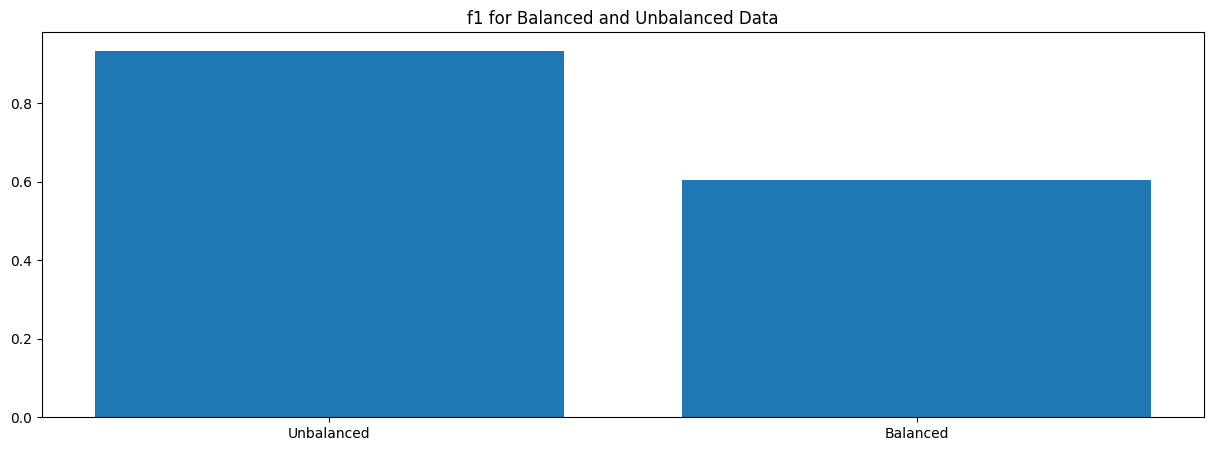

In [26]:
f1 = {"Unbalanced":f1_score(y_unbalanced_test, pred_unbalanced, average='micro'),
                        "Balanced":f1_score(y_balanced_test, pred_balanced, average='micro')}

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(f1.keys(), f1.values())
ax.set(title="f1 for Balanced and Unbalanced Data")

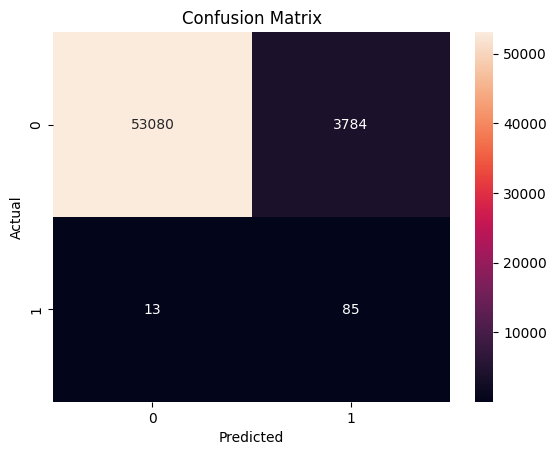

In [27]:
sns.heatmap(confusion_matrix(y_unbalanced_test, pred_unbalanced), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

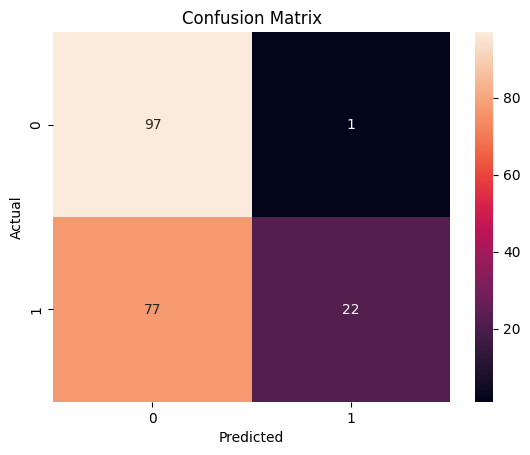

In [28]:
sns.heatmap(confusion_matrix(y_balanced_test, pred_balanced), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Balancing the dataset damaged more then it helped, as we took large amount of the normal records so the model is no longer able to distinguish between normal and anomaly. The model also couldn't predict the fraud ones correctly. Whereas for the unbalanced dataset, out of the 98 actually fraud cases, the model almost nailed it by getting 90 predicted values as truely fraud.

In [31]:
X_unbalanced_test = X_unbalanced_test.copy()
X_unbalanced_test['predicted'] = pred_unbalanced
frauds = X_unbalanced_test[X_unbalanced_test['predicted'] == 1]

In [32]:
frauds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,predicted
count,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,...,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.0
mean,-0.001319,-1.900359,-0.427955,-0.876574,0.193663,-0.221190,0.407309,-0.274975,-0.769369,0.405253,...,0.195779,-0.069270,0.175991,0.033608,0.086686,-0.013423,-0.036042,-0.199614,1.222821,1.0
std,1.022401,1.928321,2.988925,2.004800,1.688648,2.504852,1.875632,2.891632,3.328319,1.914039,...,3.418211,1.649200,3.368832,1.193097,1.640584,1.165973,3.195538,3.406271,2.797656,0.0
min,-1.995341,-17.434200,-29.104760,-22.213310,-3.927008,-17.148939,-15.664727,-33.551923,-42.215478,-12.228015,...,-31.162204,-12.246126,-52.571881,-4.582990,-16.683307,-4.289607,-55.906596,-35.478673,-0.353229,1.0
25%,-0.885546,-2.620936,-2.042690,-1.723500,-1.034479,-1.426003,-0.725621,-1.574965,-1.349082,-0.892123,...,-0.853005,-1.026344,-0.684774,-0.643940,-0.766350,-0.776890,-0.791769,-1.143926,-0.322444,1.0
50%,-0.030552,-1.479446,-0.028054,-0.607802,-0.046033,-0.201499,0.314830,-0.124786,-0.186587,0.145195,...,0.018947,0.014685,0.153733,0.166598,0.180756,-0.163301,0.039490,0.119001,-0.102709,1.0
75%,0.935754,-0.716607,1.416760,0.408256,1.144240,1.077442,1.537983,1.109417,0.573732,1.453325,...,0.999002,0.975427,1.148252,0.964865,1.077854,0.681238,1.160467,0.760340,1.670602,1.0
max,1.641763,1.196127,13.000139,6.187993,8.969451,21.022455,12.379805,17.328965,16.049160,14.194945,...,37.034714,11.522643,35.364272,5.742687,11.646109,5.668913,22.795238,48.297447,39.627633,1.0


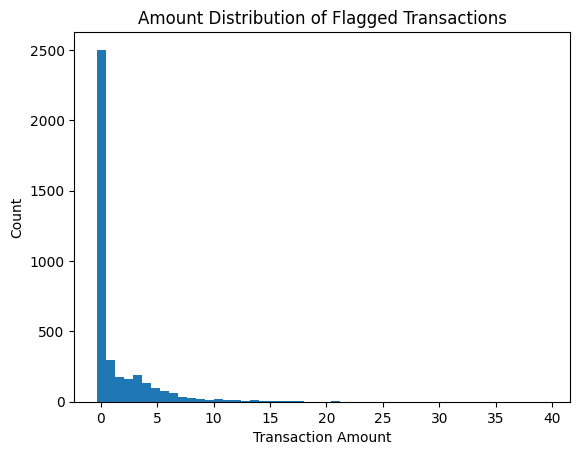

In [33]:
plt.hist(frauds['Amount'], bins=50)
plt.title("Amount Distribution of Flagged Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

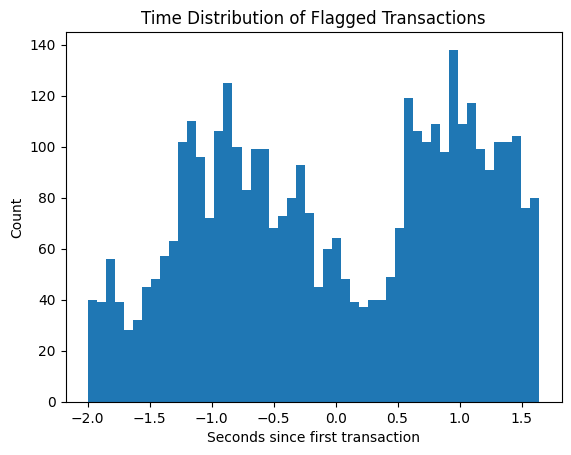

In [34]:
plt.hist(frauds['Time'], bins=50)
plt.title("Time Distribution of Flagged Transactions")
plt.xlabel("Seconds since first transaction")
plt.ylabel("Count")
plt.show()

As shown in the histograms above, the anomalies detected rely on certain ranges of Time and Amount which reveals a specific pattern that the model learned it to predict the anomalies